In [104]:
import pandas as pd 
import numpy as np
from sklearn import svm,metrics

X = pd.read_excel('X_Values.xlsx')
Y = pd.read_excel('Y_Values.xlsx')
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,age,density
0,0.052291,0.064815,0.010565,0.007271,0.001039,0.000890,0.000059,0.000148,0.000119,0.000148,...,0.110825,0.095361,0.051546,0.061856,0.054124,0.074742,0.038660,0.074742,37,3
1,0.058612,0.075647,0.012019,0.006262,0.000564,0.000297,0.000030,0.000030,0.000148,0.000030,...,0.056716,0.062687,0.095522,0.056716,0.023881,0.062687,0.077612,0.047761,37,3
2,0.058434,0.075202,0.013325,0.007716,0.001128,0.000594,0.000119,0.000237,0.000297,0.000326,...,0.086351,0.055710,0.080780,0.044568,0.052925,0.108635,0.047354,0.089136,58,3
3,0.074994,0.074282,0.015017,0.007093,0.000712,0.000623,0.000089,0.000000,0.000059,0.000178,...,0.069686,0.094077,0.066202,0.048780,0.017422,0.097561,0.087108,0.076655,58,3
4,0.098973,0.076330,0.020685,0.003324,0.000712,0.000297,0.000030,0.000148,0.000059,0.000030,...,0.076125,0.086505,0.034602,0.051903,0.044983,0.086505,0.083045,0.024221,57,2


In [105]:
X1 = X.iloc[:,33:35]
X.drop(columns=['age','density'])

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.052291,0.064815,0.010565,0.007271,0.001039,0.000890,0.000059,0.000148,0.000119,0.000148,...,0.038660,0.064433,0.110825,0.095361,0.051546,0.061856,0.054124,0.074742,0.038660,0.074742
1,0.058612,0.075647,0.012019,0.006262,0.000564,0.000297,0.000030,0.000030,0.000148,0.000030,...,0.116418,0.056716,0.056716,0.062687,0.095522,0.056716,0.023881,0.062687,0.077612,0.047761
2,0.058434,0.075202,0.013325,0.007716,0.001128,0.000594,0.000119,0.000237,0.000297,0.000326,...,0.105850,0.025070,0.086351,0.055710,0.080780,0.044568,0.052925,0.108635,0.047354,0.089136
3,0.074994,0.074282,0.015017,0.007093,0.000712,0.000623,0.000089,0.000000,0.000059,0.000178,...,0.087108,0.094077,0.069686,0.094077,0.066202,0.048780,0.017422,0.097561,0.087108,0.076655
4,0.098973,0.076330,0.020685,0.003324,0.000712,0.000297,0.000030,0.000148,0.000059,0.000030,...,0.100346,0.069204,0.076125,0.086505,0.034602,0.051903,0.044983,0.086505,0.083045,0.024221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.046890,0.055051,0.008547,0.005104,0.001959,0.001306,0.000059,0.000000,0.000000,0.000059,...,0.023529,0.035294,0.070588,0.035294,0.111765,0.088235,0.100000,0.017647,0.017647,0.023529
773,0.060779,0.065794,0.010595,0.007746,0.001039,0.000178,0.000089,0.000148,0.000178,0.000119,...,0.040000,0.086154,0.101538,0.089231,0.043077,0.027692,0.083077,0.080000,0.049231,0.089231
774,0.050214,0.062886,0.011841,0.007775,0.001484,0.000772,0.000148,0.000119,0.000059,0.000030,...,0.058020,0.054608,0.051195,0.109215,0.040956,0.092150,0.092150,0.085324,0.068259,0.085324
775,0.077784,0.074519,0.013444,0.003294,0.000564,0.000297,0.000148,0.000178,0.000089,0.000000,...,0.059829,0.085470,0.072650,0.072650,0.055556,0.111111,0.111111,0.089744,0.025641,0.038462


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(2)
x, X_test, y, Y_test = train_test_split(X1,Y,test_size=0.2,train_size=0.8)
X_train, X_validation, Y_train, Y_validation = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [107]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train,Y_train)
Y_pred = classifier1.predict(X_test)
acc = metrics.accuracy_score(Y_pred,Y_test)
print('Accuracy score using Decision Tree classifier is {:0.2f}%'.format(acc*100))

Accuracy score using Decision Tree classifier is 72.44%


In [108]:
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(classifier1) 
clf.fit(X_train, Y_train)
Y_proba1 = clf.predict_proba(X_test)
print(Y_proba1)

[[0.40512463 0.59487537]
 [0.28018334 0.71981666]
 [0.44557999 0.55442001]
 [0.43398378 0.56601622]
 [0.47136575 0.52863425]
 [0.83061126 0.16938874]
 [0.83061126 0.16938874]
 [0.47136575 0.52863425]
 [0.1492588  0.8507412 ]
 [0.49381605 0.50618395]
 [0.40512463 0.59487537]
 [0.33133324 0.66866676]
 [0.1492588  0.8507412 ]
 [0.1492588  0.8507412 ]
 [0.83061126 0.16938874]
 [0.16494432 0.83505568]
 [0.4799297  0.5200703 ]
 [0.53674214 0.46325786]
 [0.1492588  0.8507412 ]
 [0.42582986 0.57417014]
 [0.40512463 0.59487537]
 [0.1492588  0.8507412 ]
 [0.54365524 0.45634476]
 [0.73467192 0.26532808]
 [0.26937317 0.73062683]
 [0.1492588  0.8507412 ]
 [0.83061126 0.16938874]
 [0.1492588  0.8507412 ]
 [0.41689942 0.58310058]
 [0.83061126 0.16938874]
 [0.49020905 0.50979095]
 [0.29705667 0.70294333]
 [0.1492588  0.8507412 ]
 [0.41689942 0.58310058]
 [0.26937317 0.73062683]
 [0.61238284 0.38761716]
 [0.2891794  0.7108206 ]
 [0.83061126 0.16938874]
 [0.1492588  0.8507412 ]
 [0.83061126 0.16938874]


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
np.random.seed(2)
x, X_test, y, Y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
X_train, X_validation, Y_train, Y_validation = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [110]:
from sklearn.model_selection import GridSearchCV

params ={'kernel':['rbf'],
            'C':[1,10,100,1000],
            'coef0':[0.001,0.01,0.1,1,10],
            'tol':[1e-3,1e-4],
            'gamma':[0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2.0]}
SVModel = svm.SVC()
GridS = GridSearchCV(SVModel,params,cv=10)
GridS.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'coef0': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8,
                                   2.0],
                         'kernel': ['rbf'], 'tol': [0.001, 0.0001]})

In [111]:
GridS.best_params_

{'C': 10, 'coef0': 0.001, 'gamma': 1.6, 'kernel': 'rbf', 'tol': 0.001}

In [112]:
from sklearn import svm,metrics
classifier2 = GridS
classifier2.fit(X_train,Y_train)
Y_Pred = classifier2.predict(X_validation)
acc = metrics.accuracy_score(Y_Pred,Y_validation)
print('Validation accuracy is {:0.2f}%'.format(acc*100))
print(Y_validation)
print(Y_Pred)

Validation accuracy is 73.08%
     0
428  1
745  1
669  1
328  0
283  0
..  ..
635  1
720  1
468  1
299  0
775  1

[156 rows x 1 columns]
[1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 1]


In [113]:
Y_Pred = classifier2.predict(X_test)
acc = metrics.accuracy_score(Y_Pred,Y_test)
print('Testing accuracy is {:0.2f}%'.format(acc*100))
print(Y_test)
print(Y_Pred)

Testing accuracy is 76.92%
     0
624  1
157  0
174  0
109  0
20   0
..  ..
334  0
681  1
309  0
522  1
479  1

[156 rows x 1 columns]
[1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 0 0 0]


In [114]:
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(classifier2) 
clf.fit(X_train, Y_train)
Y_proba2 = clf.predict_proba(X_test)
print(Y_proba2)

[[0.18134768 0.81865232]
 [0.37102459 0.62897541]
 [0.42082091 0.57917909]
 [0.61878954 0.38121046]
 [0.5090976  0.4909024 ]
 [0.80769366 0.19230634]
 [0.80819227 0.19180773]
 [0.64115135 0.35884865]
 [0.15217609 0.84782391]
 [0.75014728 0.24985272]
 [0.57834779 0.42165221]
 [0.23070263 0.76929737]
 [0.17952171 0.82047829]
 [0.21481629 0.78518371]
 [0.81151168 0.18848832]
 [0.24052695 0.75947305]
 [0.83569459 0.16430541]
 [0.24867665 0.75132335]
 [0.15665251 0.84334749]
 [0.44544532 0.55455468]
 [0.13024844 0.86975156]
 [0.15463922 0.84536078]
 [0.39267478 0.60732522]
 [0.74124563 0.25875437]
 [0.13937837 0.86062163]
 [0.17292018 0.82707982]
 [0.79103613 0.20896387]
 [0.15854335 0.84145665]
 [0.29246856 0.70753144]
 [0.80760742 0.19239258]
 [0.3060456  0.6939544 ]
 [0.24805212 0.75194788]
 [0.18244976 0.81755024]
 [0.2528232  0.7471768 ]
 [0.46493374 0.53506626]
 [0.50255996 0.49744004]
 [0.31417858 0.68582142]
 [0.89932803 0.10067197]
 [0.1825262  0.8174738 ]
 [0.86217685 0.13782315]


In [116]:
probability = (Y_proba1 + Y_proba2)/2
print(probability)

[[0.29323616 0.70676384]
 [0.32560396 0.67439604]
 [0.43320045 0.56679955]
 [0.52638666 0.47361334]
 [0.49023168 0.50976832]
 [0.81915246 0.18084754]
 [0.81940176 0.18059824]
 [0.55625855 0.44374145]
 [0.15071745 0.84928255]
 [0.62198167 0.37801833]
 [0.49173621 0.50826379]
 [0.28101794 0.71898206]
 [0.16439025 0.83560975]
 [0.18203754 0.81796246]
 [0.82106147 0.17893853]
 [0.20273564 0.79726436]
 [0.65781215 0.34218785]
 [0.3927094  0.6072906 ]
 [0.15295565 0.84704435]
 [0.43563759 0.56436241]
 [0.26768653 0.73231347]
 [0.15194901 0.84805099]
 [0.46816501 0.53183499]
 [0.73795878 0.26204122]
 [0.20437577 0.79562423]
 [0.16108949 0.83891051]
 [0.81082369 0.18917631]
 [0.15390107 0.84609893]
 [0.35468399 0.64531601]
 [0.81910934 0.18089066]
 [0.39812732 0.60187268]
 [0.27255439 0.72744561]
 [0.16585428 0.83414572]
 [0.33486131 0.66513869]
 [0.36715345 0.63284655]
 [0.5574714  0.4425286 ]
 [0.30167899 0.69832101]
 [0.86496965 0.13503035]
 [0.1658925  0.8341075 ]
 [0.84639405 0.15360595]


In [117]:
combined_proba =[]
for i in probability:
    if i[1]>0.5:
        combined_proba.append(1)
    else:
        combined_proba.append(0)
print(combined_proba)

[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0]


In [118]:
acc = metrics.accuracy_score(combined_proba,Y_test)
print('Testing accuracy is {:0.2f}%'.format(acc*100))
print(Y_test)

Testing accuracy is 74.36%
     0
624  1
157  0
174  0
109  0
20   0
..  ..
334  0
681  1
309  0
522  1
479  1

[156 rows x 1 columns]


In [126]:
y = Y.to_numpy()
y1= Y_test.to_numpy()
y2 = np.array(probability)
#y1 = np.array(combined_proba)

In [133]:
report = metrics.classification_report(Y_test,combined_proba) 
print("Classification report : \n",report)

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        68
           1       0.75      0.82      0.78        88

    accuracy                           0.74       156
   macro avg       0.74      0.73      0.74       156
weighted avg       0.74      0.74      0.74       156



Accuracy :  0.7435897435897436
Sensitivity :  0.8181818181818182
Specificity :  0.6470588235294118


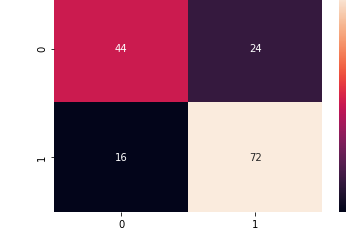

In [131]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,combined_proba)
sns.heatmap(cm,annot=True,fmt='2.0f')
total=sum(sum(cm))
accuracy1=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy1)

sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity )

specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('Specificity : ', specificity)

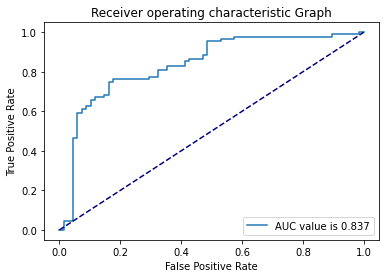

In [132]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import label_binarize
from scipy import interp
from matplotlib import pyplot as plt
fpr=dict()
tpr=dict()
roc_auc=dict()
fpr[0], tpr[0], _ = roc_curve(y1[:,0], y2[:,1])
roc_auc[0] = auc(fpr[0], tpr[0])
plt.plot(fpr[0],tpr[0],label='AUC value is {:0.3f}'.format(roc_auc[0]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver operating characteristic Graph')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()